c:\Users\samhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\samhu\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


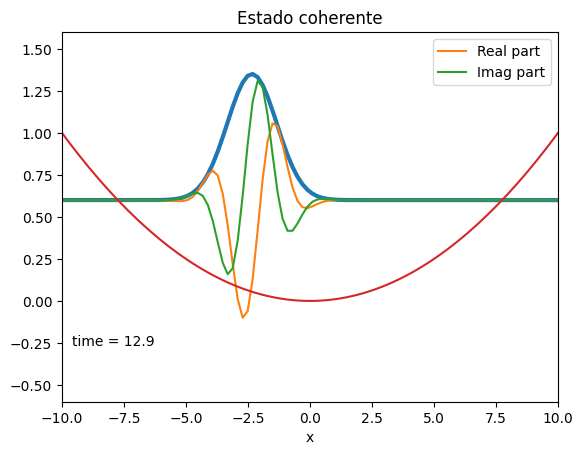

In [ ]:
import matplotlib.animation as animation
from IPython.display import display, clear_output
from IPython.display import HTML

from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
import numpy.polynomial.hermite as Herm
import math
import pylab as p
from sys import exit
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as integrate
import matplotlib.gridspec as gridspec

#Choose simple units
m=1.
w=1.
hbar=1.
#Discretized space
Npuntos=1001
xlim = 4.2
x = np.linspace(-xlim,xlim,Npuntos)
def V(x):
    return 0.5*m*w**2*x**2
def hermite(x, n):
    xi = np.sqrt(m*w/hbar)*x
    herm_coeffs = np.zeros(n+1)
    herm_coeffs[n] = 1
    return Herm.hermval(xi, herm_coeffs)
  
def psiHO(x,n):
    xi = np.sqrt(m*w/hbar)*x
    prefactor = 1./np.sqrt(2.**n * math.factorial(n)) * (m*w/(np.pi*hbar))**(0.25)
    psi = prefactor * np.exp(- xi**2 / 2) * hermite(x,n)
    return psi

def Ener(n):
    return hbar*w*(n+0.5)

nestados=6

def cohe(alpha,x,Nmax):
    coh=0.0
    for n in range(Nmax):
        coh+=alpha**n *psiHO(x,n)/math.sqrt(math.factorial(n))
    return coh*np.exp(-np.abs(alpha)**2/2)


L=20
xmin=-L;xmax=L;Npoints=200;
xx=np.linspace(xmin,xmax,Npoints) 
xx2=np.linspace(-10,10,Npoints)
alpha=2+1j

def cohet(alpha,x,Nmax,t):
    coh=0.0
    for n in range(Nmax):
        coh+=alpha**n *psiHO(x,n)/math.sqrt(math.factorial(n))*np.exp(-1j* Ener(n)* t /hbar)
    return coh*np.exp(-np.abs(alpha)**2/2)

alpha=-1-2j;NN=50;
Enercohe=hbar*w*(np.abs(alpha)**2+1/2)
xmedio=2*np.sqrt(hbar/(2*m*w))*np.real(alpha)
pmedio=2*np.sqrt(hbar*m*w/2)*np.imag(alpha)
pmedio2=hbar*m*w/2*(1+4*np.imag(alpha)**2)
xmedio2=hbar/(2*m*w)*(1+4*np.real(alpha)**2)
deltax=np.sqrt(np.abs(xmedio2-xmedio**2))
deltap=np.sqrt(np.abs(pmedio2-pmedio**2))

tfin=13.0;nt=200;deltat=tfin /float(nt)
tt=[deltat*float(i) for i in range(nt)]

#### preparo la gráfica
fig, ax = plt.subplots()
plt.xlim(-10, 10)
plt.ylim(-0.6, 1.6)
plt.xlabel('x')
plt.title('Estado coherente')
time_text = ax.text(0.02, 0.15, '', transform=ax.transAxes)

#######  Propaga en tiempo
def animate(tiempo):
    cohe=cohet(alpha,xx,NN,tiempo)
    Abs=np.abs(cohe)+0.6
    Real=np.real(cohe)+0.6
    Imag=np.imag(cohe)+0.6
    
    line.set_ydata(Abs)
    line2.set_ydata(Real)
    line3.set_ydata(Imag)
    time_text.set_text('time = %.1f' % tiempo)
    return line,line2,line3,time_text

#########  Animacion
def init():
    time_text.set_text('')
    line.set_ydata(np.ma.array(xx, mask=True))
    line2.set_ydata(np.ma.array(xx, mask=True))
    line3.set_ydata(np.ma.array(xx, mask=True))
    return line,line2,line3

line, = ax.plot(xx, cohe(alpha,xx,NN)+0.6,linewidth=3)
line2, = ax.plot(xx, cohe(alpha,xx,NN)+0.6)
line3, = ax.plot(xx, cohe(alpha,xx,NN)+0.6)
ax.legend([line2,line3], ["Real part", "Imag part"])
plt.plot(xx,V(xx)/50)    

ani = animation.FuncAnimation(fig, animate, tt, init_func=init,
            interval=40, blit=True)
HTML(ani.to_html5_video())